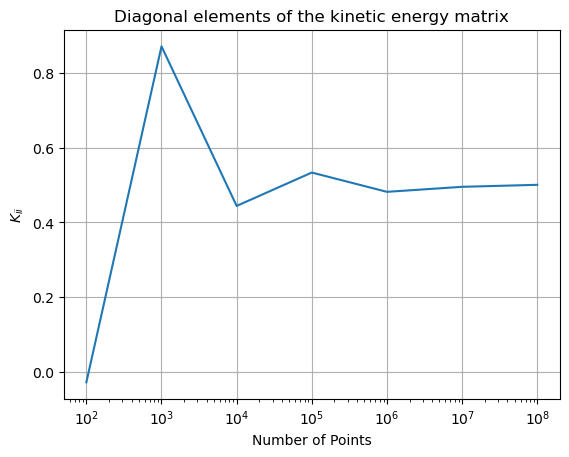

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import s

# set random seed and length of integration
np.random.seed(42)
L = 7

# initialize arrays
num_pts = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
kes = []

# perform Monte Carlo integration for each number of points
for n in num_pts:
    # set up grids for each coordinate with symmetric bounds
    x = np.random.uniform(-L, L, n)
    y = np.random.uniform(-L, L, n)
    z = np.random.uniform(-L, L, n)

    # calculate all K_ii
    integrand = -0.5 * s.psi_1s(x, y, z) * s.laplacian_psi_1s(x, y, z)
    
    # calculate the diagonal ke matrix elements
    V = (2 * L)**3
    ke_integral = V * np.mean(integrand)
    kes.append(ke_integral)

# plot the results
plt.semilogx(num_pts, kes)
plt.xlabel('Number of Points')
plt.ylabel('$K_{ii}$')
plt.title('Diagonal elements of the kinetic energy matrix')
plt.grid(True)
plt.show()

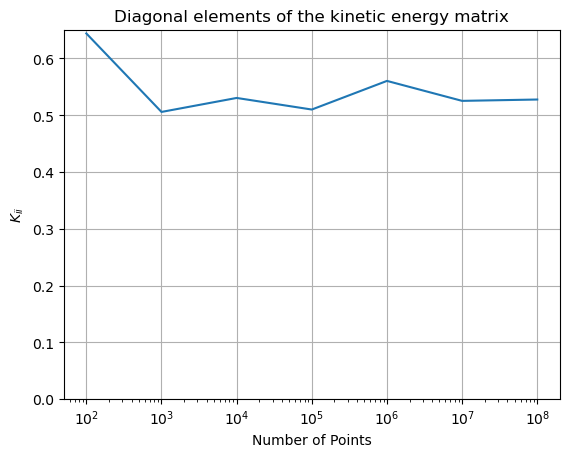

In [2]:
import scipy.stats as stats

# initialize overlaps array
kes = []

# make a gaussian distribution
mean = 0
width = 0.3
gaussian = stats.norm(mean, width)

# set number of points
num_pts = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

# perform Monte Carlo integration for each number of points with importance sampling
for n in num_pts:
    # set up grids for each coordinate
    x = gaussian.rvs(size=n)
    y = gaussian.rvs(size=n)
    z = gaussian.rvs(size=n)
    
    # obtain overlap values at each point with appropriate scaling
    denom = gaussian.pdf(x) * gaussian.pdf(y) * gaussian.pdf(z)
    numer = -0.5 * s.psi_1s(x, y, z) * s.laplacian_psi_1s(x, y, z)
    integrand = numer / denom

    # calculate the diagonal ke matrix elements
    ke = np.mean(integrand)
    kes.append(ke)

# plot the results
plt.semilogx(num_pts, kes)
plt.ylim(ymin=0)
plt.xlabel('Number of Points')
plt.ylabel('$K_{ii}$')
plt.title('Diagonal elements of the kinetic energy matrix')
plt.grid(True)
plt.show()

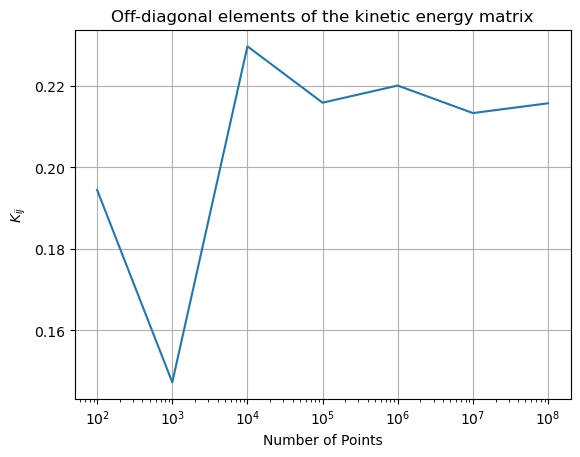

In [3]:
# length of integration and separation distance
L = 7
R_z = 1.4

# initialize arrays
num_pts = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
kes = []

# perform Monte Carlo integration for each number of points
for n in num_pts:
    # set up grids for each coordinate with symmetric bounds
    x = np.random.uniform(-L, L, n)
    y = np.random.uniform(-L, L, n)
    z = np.random.uniform(-L, L, n)

    # calculate all K_ij
    integrand = -0.5 * s.psi_1s(x, y, z + R_z / 2) * s.laplacian_psi_1s(x, y, z - R_z / 2)
    
    # calculate the off-diagonal ke matrix elements
    V = (2 * L)**3
    ke_integral = V * np.mean(integrand)
    kes.append(ke_integral)

# plot the results
plt.semilogx(num_pts, kes)
plt.xlabel('Number of Points')
plt.ylabel('$K_{ij}$')
plt.title('Off-diagonal elements of the kinetic energy matrix')
plt.grid(True)
plt.show()

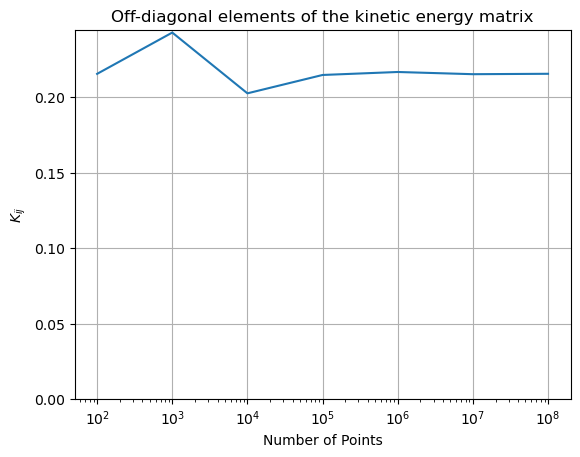

In [9]:
# initialize overlaps array
kes = []

# make a gaussian distribution
mean = 0
width = 1
gaussian = stats.norm(mean, width)

# set number of points and separation distance
num_pts = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
R_z = 1.4

# perform Monte Carlo integration for each number of points with importance sampling
for n in num_pts:
    # set up grids for each coordinate
    x = gaussian.rvs(size=n)
    y = gaussian.rvs(size=n)
    z = gaussian.rvs(size=n)
    
    # obtain overlap values at each point with appropriate scaling
    denom = gaussian.pdf(x) * gaussian.pdf(y) * gaussian.pdf(z)
    numer = -0.5 * s.psi_1s(x, y, z + R_z / 2) * s.laplacian_psi_1s(x, y, z - R_z / 2)
    integrand = numer / denom

    # calculate the off-diagonal ke matrix elements
    ke = np.mean(integrand)
    kes.append(ke)

# plot the results
plt.semilogx(num_pts, kes)
plt.ylim(ymin=0)
plt.xlabel('Number of Points')
plt.ylabel('$K_{ij}$')
plt.title('Off-diagonal elements of the kinetic energy matrix')
plt.grid(True)
plt.show()

In [10]:
# Importance sampling out-perfroms random sampling in each of these
# examples, particularly for low numbers of points sampled. The most stark
# difference between the two methods can be seen for the calculation for 
# the off-diagonal elements of the kinetic energy matrix, likely because
# of the diffuse nature of these orbitals relative to a single 1s orbital.